**UUZOP Projekt, 1.dio, Priprema i Vizualizacija Reuters21578 Dataseta**

Za početak, potrebno je učitati dataset. Reuters21578 dataset je podijeljen u 3 podseta: ModApte, ModHayes i ModLewis. Svaki podset je podijeljen u train, test
i unused dio. Train podset se sastoji od 9603 dokumenta, test podset od 3299 dokumenata te unused ima 722 dokumenta (retka u tablici). Za potrebe ovog dijela vježba koristiti ćemo ModApte podset dataseta. Nakon što učitamo dataset, pretvorit ćemo da u pandas dataframe zbog daljnjeg korištenja.

In [ ]:
!pip install datasets

In [5]:
from datasets import load_dataset
import pandas as pd

# Load the Reuters-21578 dataset
print("Loading Reuters-21578 dataset...")


# Load the Reuters-21578 dataset
reuters_dataset = load_dataset("reuters21578", "ModApte")
print("Reuters-21578 dataset loaded.")

df = pd.DataFrame(training_data)


Loading Reuters-21578 dataset...
Reuters-21578 dataset loaded.


Sada možemo prikazati neke osnovne informacije o našem train dijelu dataseta nad kojim ćemo graditi model kasnije. S metodom info() nad našim dataframeom možemo prikazati imena svih stupaca koji kategoriziraju naš dataset te informacije o tipu podataka koji se nalazi u njima te o non null vrijednostima.

In [6]:
print("Basic Information about the DataFrame:")
print(df.info())

Basic Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9603 entries, 0 to 9602
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         9603 non-null   object
 1   text_type    9603 non-null   object
 2   topics       9603 non-null   object
 3   lewis_split  9603 non-null   object
 4   cgis_split   9603 non-null   object
 5   old_id       9603 non-null   object
 6   new_id       9603 non-null   object
 7   places       9603 non-null   object
 8   people       9603 non-null   object
 9   orgs         9603 non-null   object
 10  exchanges    9603 non-null   object
 11  date         9603 non-null   object
 12  title        9603 non-null   object
dtypes: object(13)
memory usage: 975.4+ KB
None


Također, možemo prikazati prvih 5 redaka našeg dataframea da vidimo kako podaci izgledaju.

In [7]:
# Display the first few rows of the DataFrame
print("\nFirst Few Rows of the DataFrame:")
print(df.head())



First Few Rows of the DataFrame:
                                                text text_type  \
0  Showers continued throughout the week in\nthe ...    "NORM"   
1  The U.S. Agriculture Department\nreported the ...    "NORM"   
2  Argentine grain board figures show\ncrop regis...    "NORM"   
3  Moody's Investors Service Inc said it\nlowered...    "NORM"   
4  Champion Products Inc said its\nboard of direc...    "NORM"   

                                              topics lewis_split  \
0                                            [cocoa]     "TRAIN"   
1         [grain, wheat, corn, barley, oat, sorghum]     "TRAIN"   
2  [veg-oil, linseed, lin-oil, soy-oil, sun-oil, ...     "TRAIN"   
3                                                 []     "TRAIN"   
4                                             [earn]     "TRAIN"   

       cgis_split  old_id new_id                       places people orgs  \
0  "TRAINING-SET"  "5544"    "1"  [el-salvador, usa, uruguay]     []   []   
1  "TR

Nadalje, možemo prikazati distribuciju kategorija u nekim od stupaca, npr. categories i places. Vidimo da u stupcu kategorija imamo 473 različite kombinacije sa barem jednim retkom. Najviše dokumenata je kategorizirano kao 'earn'. S druge strane, stupac 'places' sadrži 637 kombinacija s barem jednim retkom od kojih je najviše njih kategorizirano kao 'usa'.

In [8]:
# Display the distribution of categories
print("\nDistribution of Categories:")
print(df['topics'].value_counts())

# Display the distribution of places
print("\nDistribution of Places:")
print(df['places'].value_counts())



Distribution of Categories:
[earn]                                            2840
[]                                                1828
[acq]                                             1596
[crude]                                            253
[trade]                                            251
                                                  ... 
[grain, wheat, oilseed, soybean, cotton, rice]       1
[gnp, cpi, reserves]                                 1
[earn, copper]                                       1
[acq, trade]                                         1
[dlr, money-fx, trade, cpi, money-supply]            1
Name: topics, Length: 473, dtype: int64

Distribution of Places:
[usa]                                     4896
[]                                         644
[uk]                                       610
[canada]                                   452
[japan]                                    209
                                          ... 
[india, malaysia]  

Zatim možemo istražiti nedostajuće i stršeče vrijednosti. Stršećih vrijednosti nema zato jer su svi podaci u dataframeu stringovi. Nedostajuće vrijednosti ćemo provjeriti na sljedeći način:

In [11]:
# Count the number of missing values in each column
missing_values_count = df.isna().sum()

# Display the counts of missing values
print("Counts of Missing Values in Each Column:")
print(missing_values_count)


Counts of Missing Values in Each Column:
text           0
text_type      0
topics         0
lewis_split    0
cgis_split     0
old_id         0
new_id         0
places         0
people         0
orgs           0
exchanges      0
date           0
title          0
dtype: int64


Vidimo kako nema nedostajućih vrijednosti. Nadalje, možemo provjeriti koliko dokumenata nema kategorizaciju u nekim od stupaca. S obzirom da se radi o stringovima ili sekvencama napravit ćemo funkciju koja će provjeravati je li ta sekvenca prazna ili nije te ćemo je primijeniti na naš dataframe. Vidimo da neke od kategorija imaju podosta praznih vrijednosti što bi nam moglo biti korisno u nastavku projekta.

In [12]:
#Function to check if a sequence is empty
def is_empty_sequence(seq):
    return len(seq) == 0

# Apply the function to each element in the DataFrame
empty_sequences_mask = df.apply(lambda col: col.apply(is_empty_sequence))

# Count the number of occurrences of empty sequences in each column
empty_sequences_count = empty_sequences_mask.sum()

# Display the counts of empty sequences in each column
print("Counts of Empty Sequences in Each Column:")
print(empty_sequences_count)

Counts of Empty Sequences in Each Column:
text            787
text_type         0
topics         1828
lewis_split       0
cgis_split        0
old_id            0
new_id            0
places          644
people         9170
orgs           9147
exchanges      9530
date              0
title            54
dtype: int64


S obzirom da, kako smo već naveli, radimo s tekstualnim podacima tako da ne možemo raditi histogram značajki s zadanim dataframeom, možemo napraviti analizu duljine teksta svakog dokumenta kao numeričku značajku te nad njome napraviti histogram.

In [14]:
import matplotlib.pyplot as plt

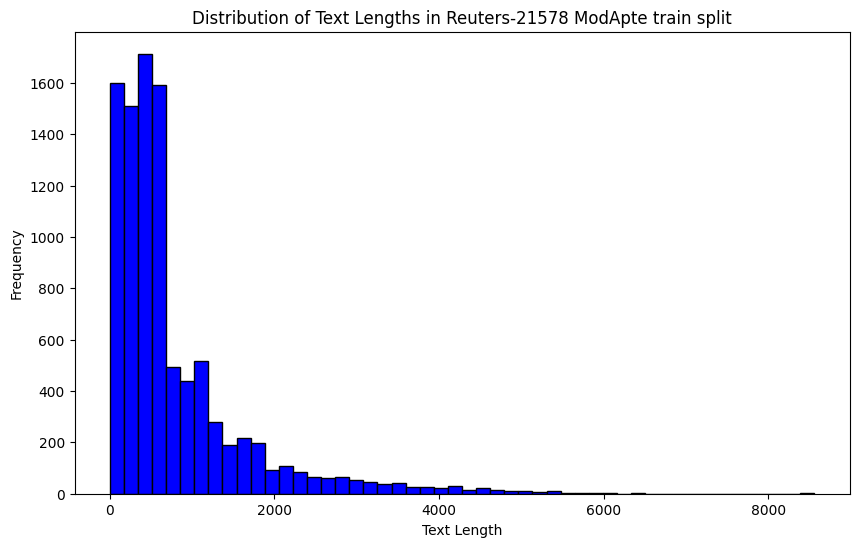

In [16]:
# Create a new column for the length of the text in each document
df['text_length'] = df['text'].apply(len)

# Plot the histogram of text lengths
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Text Lengths in Reuters-21578 ModApte train split')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

Nadalje, možemo prikazati najčešće spominjane riječi u dokumentima u obliku oblaka.

In [17]:
from wordcloud import WordCloud

7429597


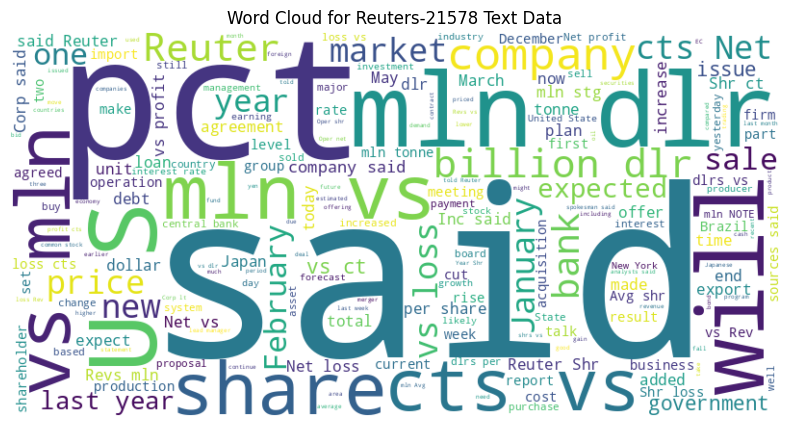

In [20]:
text_corpus = ' '.join(df['text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reuters-21578 Text Data')
plt.show()

Daljnju obradu podataka jezgrenim metodama te nastavak projekta ostavljam za 2.dio predaje.